<a href="https://colab.research.google.com/github/HIsu1231/Hands-On-ML/blob/main/handsonml_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

##그레디언트 소실과 폭주 문제

In [ ]:
def logit(z):
  return 1 / (1 + np.exp(-z))

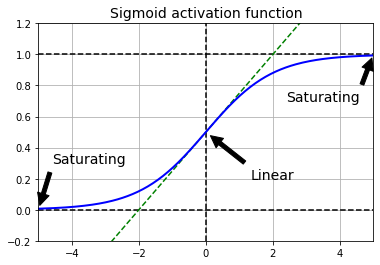

In [ ]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k--')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha='center')
plt.grid('center')
plt.grid(True)
plt.title('Sigmoid activation function', fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

##Xavier 초기화와 He 초기화

In [ ]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [ ]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [ ]:
init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

##수렴하지 않는 활성화 함수

###LeakyReLU

In [ ]:
def leaky_relu(z, alpha=0.01):
  return np.maximum(alpha*z, z)

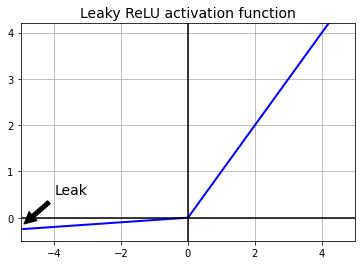

In [ ]:
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha='center')
plt.title('Leaky ReLU activation function', fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [ ]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [ ]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

LeakyReLU를 사용해 패션 MNIST에서 신경망 훈련

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5339 - accuracy: 0.8223 - val_loss: 0.5156 - val_accuracy:

PReLU 테스트

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7628
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6966 - accuracy: 0.7694 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5618 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8240
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5390 - accuracy: 0.8206 - val_loss: 0.5196 - val_accuracy:

ELU

In [ ]:
def elu(z, alpha=1):
  return np.where(z < 0, alpha * (np.exp(z) - 1), z)

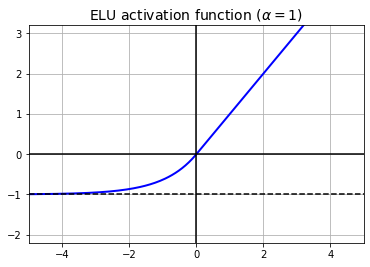

In [ ]:
plt.plot(z, elu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r'ELU activation function ($\alpha=1$)', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [ ]:
keras.layers.Dense(10, activation='elu')

SELU

In [ ]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
  return scale * elu(z, alpha)

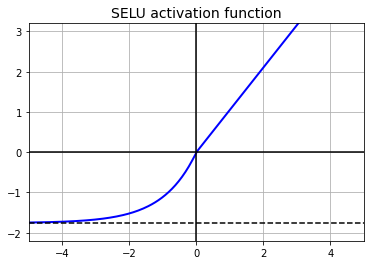

In [ ]:
plt.plot(z, selu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title('SELU activation function', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [ ]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
  W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
  Z = selu(np.dot(Z, W))
  means = np.mean(Z, axis=0).mean()
  stds = np.std(Z, axis=0).mean()
  
  if layer % 100 == 0:
    print('Layer {}: mean {:.2f}, std deviation {:.2f}'.format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [ ]:
keras.layers.Dense(10, activation='selu', kernel_initializer='lecun_normal')

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'))

for layer in range(99):
  model.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 35s 19ms/step - loss: 1.3776 - accuracy: 0.4540 - val_loss: 1.1731 - val_accuracy: 0.5614
Epoch 2/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.9138 - accuracy: 0.6665 - val_loss: 0.7028 - val_accuracy: 0.7484
Epoch 3/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.6962 - accuracy: 0.7481 - val_loss: 0.6540 - val_accuracy: 0.7546
Epoch 4/5
1719/1719 [==============================] - 30s 18ms/step - loss: 0.6539 - accuracy: 0.7676 - val_loss: 0.5557 - val_accuracy: 0.7978
Epoch 5/5
1719/1719 [==============================] - 32s 19ms/step - loss: 0.5582 - accuracy: 0.7990 - val_loss: 0.5703 - val_accuracy: 0.8016


In [ ]:
np.random.seed(42)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))

for layer in range(99):
  model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 31s 17ms/step - loss: 1.8261 - accuracy: 0.2616 - val_loss: 1.3347 - val_accuracy: 0.3894
Epoch 2/5
1719/1719 [==============================] - 29s 17ms/step - loss: 1.1959 - accuracy: 0.4908 - val_loss: 0.9373 - val_accuracy: 0.5902
Epoch 3/5
1719/1719 [==============================] - 29s 17ms/step - loss: 0.9600 - accuracy: 0.6118 - val_loss: 0.9026 - val_accuracy: 0.5906
Epoch 4/5
1719/1719 [==============================] - 27s 16ms/step - loss: 0.8231 - accuracy: 0.6759 - val_loss: 0.7320 - val_accuracy: 0.7290
Epoch 5/5
1719/1719 [==============================] - 27s 16ms/step - loss: 0.7360 - accuracy: 0.7171 - val_loss: 0.7823 - val_accuracy: 0.7108


##배치정규화

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_212 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_213 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_214 (Dense)            (None, 10)               

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8750 - accuracy: 0.7124 - val_loss: 0.5525 - val_accuracy: 0.8228
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5753 - accuracy: 0.8031 - val_loss: 0.4725 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5190 - accuracy: 0.8204 - val_loss: 0.4375 - val_accuracy: 0.8548
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4827 - accuracy: 0.8324 - val_loss: 0.4152 - val_accuracy: 0.8596
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4566 - accuracy: 0.8410 - val_loss: 0.3997 - val_accuracy: 0.8644
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4398 - accuracy: 0.8475 - val_loss: 0.3867 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4242 - accuracy: 0.8514 - val_loss: 0.3764 - val_accuracy:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6790 - accuracy: 0.7793 - val_loss: 0.5566 - val_accuracy: 0.8180
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5447 - accuracy: 0.8193 - val_loss: 0.4666 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5109 - accuracy: 0.8279 - val_loss: 0.4434 - val_accuracy: 0.8532
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4898 - accuracy: 0.8337 - val_loss: 0.4263 - val_accuracy: 0.8550
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4712 - accuracy: 0.8396 - val_loss: 0.4130 - val_accurac

##그레이디언트 클리핑

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [ ]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

##사전 훈련된 층 재사용하기

In [ ]:
def split_dataset(X, y):
  y_5_or_6 = (y == 5) | (y == 6) 
  y_A = y[~y_5_or_6]
  y_A[y_A > 6] -= 2
  y_B = (y[y_5_or_6] == 6).astype(np.float32)
  return ((X[~y_5_or_6], y_A),
          (X[y_5_or_6], y_B))
  
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test,y_test)

X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
X_train_A.shape

(43986, 28, 28)

In [ ]:
X_train_B.shape

(200, 28, 28)

In [ ]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [ ]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50, 50):
  model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [ ]:
model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.5215 - accuracy: 0.8309 - val_loss: 0.3713 - val_accuracy: 0.8687
Epoch 2/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3388 - accuracy: 0.8834 - val_loss: 0.3121 - val_accuracy: 0.8891
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3052 - accuracy: 0.8942 - val_loss: 0.2892 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2876 - accuracy: 0.9016 - val_loss: 0.2795 - val_accuracy: 0.9041
Epoch 5/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2756 - accuracy: 0.9052 - val_loss: 0.2695 - val_accuracy: 0.9076
Epoch 6/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9085 - val_loss: 0.2647 - val_accuracy: 0.9098
Epoch 7/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2591 - accuracy: 0.9114 - val_loss: 0.2700 - val_accuracy:

In [ ]:
model_A.save('my_model_A.h5')

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))

for n_hidden in (300, 100, 50, 50, 50):
  model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_B.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 39ms/step - loss: 0.7163 - accuracy: 0.5300 - val_loss: 0.5416 - val_accuracy: 0.7343
Epoch 2/20
7/7 [==============================] - 0s 15ms/step - loss: 0.4794 - accuracy: 0.8000 - val_loss: 0.4450 - val_accuracy: 0.8580
Epoch 3/20
7/7 [==============================] - 0s 14ms/step - loss: 0.3985 - accuracy: 0.8800 - val_loss: 0.3907 - val_accuracy: 0.8905
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3490 - accuracy: 0.9100 - val_loss: 0.3515 - val_accuracy: 0.9006
Epoch 5/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3112 - accuracy: 0.9150 - val_loss: 0.3198 - val_accuracy: 0.9128
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2797 - accuracy: 0.9250 - val_loss: 0.2945 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 0s 17ms/step - loss: 0.2546 - accuracy: 0.9400 - val_loss: 0.2748 - val_accuracy: 0.9270
Epoch 8/20
7/7 [===========

In [ ]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_225 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_226 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_227 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_228 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_229 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_230 (Dense)            (None, 1)                

In [ ]:
model_A = keras.models.load_model('my_model_A.h5')
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=['accuracy'])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 46ms/step - loss: 0.6833 - accuracy: 0.5500 - val_loss: 0.6624 - val_accuracy: 0.6055
Epoch 2/4
7/7 [==============================] - 0s 31ms/step - loss: 0.6240 - accuracy: 0.6100 - val_loss: 0.6125 - val_accuracy: 0.6420
Epoch 3/4
7/7 [==============================] - 0s 31ms/step - loss: 0.5761 - accuracy: 0.6800 - val_loss: 0.5683 - val_accuracy: 0.6886
Epoch 4/4
7/7 [==============================] - 0s 19ms/step - loss: 0.5339 - accuracy: 0.7000 - val_loss: 0.5279 - val_accuracy: 0.7272
Epoch 1/16
7/7 [==============================] - 1s 38ms/step - loss: 0.4264 - accuracy: 0.8250 - val_loss: 0.3386 - val_accuracy: 0.9300
Epoch 2/16
7/7 [==============================] - 0s 14ms/step - loss: 0.2972 - accuracy: 0.9200 - val_loss: 0.2659 - val_accuracy: 0.9533
Epoch 3/16
7/7 [==============================] - 0s 14ms/step - loss: 0.2372 - accuracy: 0.9450 - val_loss: 0.2211 - val_accuracy: 0.9675
Epoch 4/16
7/7 [===============

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9705


[0.14390385150909424, 0.9704999923706055]

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9915


[0.07056567072868347, 0.9915000200271606]

In [ ]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

##고속 옵티마이저

### 모멘텀 옵티마이저

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

###네스테로프 가속 경사

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

###AdaGrad

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

###RMSProp

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

###Adam 옵티마이저

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

###Adamax 옵티마이저

In [ ]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

###Nadam 옵티마이저

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

##학습률 스케줄링
###거듭제곱 스케줄링

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28,]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4850 - accuracy: 0.8296 - val_loss: 0.4023 - val_accuracy: 0.8592
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8677 - val_loss: 0.3689 - val_accuracy: 0.8710
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3443 - accuracy: 0.8785 - val_loss: 0.3685 - val_accuracy: 0.8720
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3236 - accuracy: 0.8841 - val_loss: 0.3480 - val_accuracy: 0.8774
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3086 - accuracy: 0.8907 - val_loss: 0.3405 - val_accuracy: 0.8766
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8949 - val_loss: 0.3378 - val_accuracy: 0.8820
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2852 - accuracy: 0.8989 - val_loss: 0.3339 - val_accuracy:

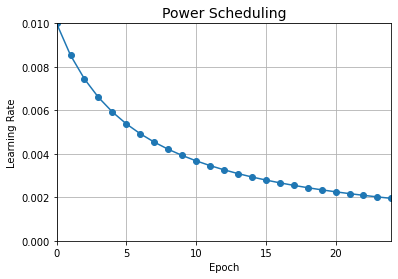

In [ ]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size=32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, 'o-')
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Power Scheduling', fontsize=14)
plt.grid(True)
plt.show()

###지수 기반 스케줄링

In [ ]:
def exponential_decay_fn(epoch):
  return 0.01 * 0.1 ** (epoch / 20)

In [ ]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1 ** (epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs=25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8712 - accuracy: 0.7486 - val_loss: 1.0299 - val_accuracy: 0.7194
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7215 - accuracy: 0.7783 - val_loss: 0.7439 - val_accuracy: 0.7830
Epoch 3/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.7053 - accuracy: 0.7879 - val_loss: 1.1070 - val_accuracy: 0.7038
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6174 - accuracy: 0.8135 - val_loss: 0.5686 - val_accuracy: 0.8404
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5578 - accuracy: 0.8274 - val_loss: 0.6160 - val_accuracy: 0.8362
Epoch 6/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5341 - accuracy: 0.8373 - val_loss: 0.5498 - val_accuracy: 0.8448
Epoch 7/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4829 - accuracy: 0.8496 - val_loss: 0.5892 - val_ac

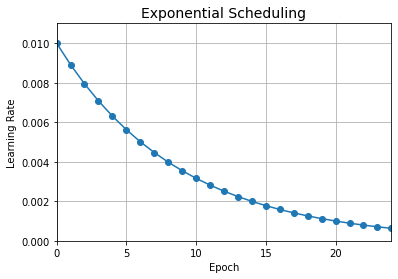

In [ ]:
plt.plot(history.epoch, history.history['lr'], 'o-')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
def exponential_decay_fn(epoch, lr):
  return lr * 0.1 ** (1 / 20)

In [ ]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
  def __init__(self, s=40000):
    super().__init__()
    self.s = s

  def on_batch_begin(self, batch, logs=None):
    lr = K.get_value(self.model.optimizer.lr)
    K.set_value(self.model.optimizer.lr, lr * 0.1 ** (1 / s))

  def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}
    logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs = 25

s = 20 * len(X_train) // 32
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8346 - accuracy: 0.7608 - val_loss: 1.1796 - val_accuracy: 0.7638
Epoch 2/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6607 - accuracy: 0.8016 - val_loss: 0.5223 - val_accuracy: 0.8222
Epoch 3/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5749 - accuracy: 0.8268 - val_loss: 0.6160 - val_accuracy: 0.8216
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5131 - accuracy: 0.8459 - val_loss: 0.5104 - val_accuracy: 0.8506
Epoch 5/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4702 - accuracy: 0.8585 - val_loss: 0.4677 - val_accuracy: 0.8626
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4430 - accuracy: 0.8670 - val_loss: 0.4980 - val_accuracy: 0.8596
Epoch 7/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4026 - accuracy: 0.8753 - val_loss: 0.5051 - val_ac

In [ ]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1 ** (steps / s)

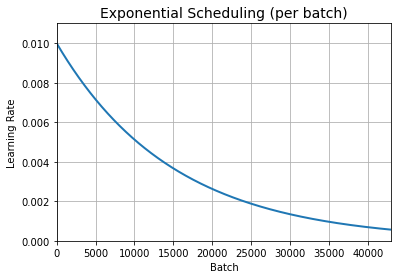

In [ ]:
plt.plot(steps, lrs, '-', linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel('Batch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling (per batch)', fontsize=14)
plt.grid(True)
plt.show()

###기간별 고정 스케줄링

In [ ]:
def piecewise_constant_fn(epoch):
  if epoch < 5:
    return 0.01
  elif epoch < 15:
    return 0.005
  else:
    return 0.001

In [ ]:
def piecewise_constant(boundaries, values):
  boundaries = np.array([0] + boundaries)
  values = np.array(values)
  def piecewise_constant_fn(epoch):
    return values[np.argmax(boundaries > epoch) - 1]
  return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 12s 6ms/step - loss: 0.8358 - accuracy: 0.7578 - val_loss: 0.8087 - val_accuracy: 0.7548
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.9939 - accuracy: 0.7054 - val_loss: 0.8671 - val_accuracy: 0.6820
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.9299 - accuracy: 0.6950 - val_loss: 1.2107 - val_accuracy: 0.6108
Epoch 4/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.9732 - accuracy: 0.6760 - val_loss: 0.9403 - val_accuracy: 0.6772
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 1.0188 - accuracy: 0.6744 - val_loss: 0.9445 - val_accuracy: 0.7206
Epoch 6/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6972 - accuracy: 0.7441 - val_loss: 0.7411 - val_accuracy: 0.7538
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6783 - accuracy: 0.7561 - val_loss: 0.7534 - val_ac

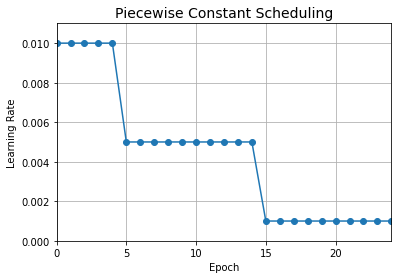

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], 'o-')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Piecewise Constant Scheduling', fontsize=14)
plt.grid(True)
plt.show()

###성능 기반 스케줄링

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5908 - accuracy: 0.8070 - val_loss: 0.4863 - val_accuracy: 0.8474
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4939 - accuracy: 0.8393 - val_loss: 0.6034 - val_accuracy: 0.8374
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5016 - accuracy: 0.8439 - val_loss: 0.4986 - val_accuracy: 0.8544
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5030 - accuracy: 0.8486 - val_loss: 0.5206 - val_accuracy: 0.8588
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5136 - accuracy: 0.8504 - val_loss: 0.4708 - val_accuracy: 0.8560
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5028 - accuracy: 0.8559 - val_loss: 0.5840 - val_accuracy: 0.8518
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5166 - accuracy: 0.8557 - val_loss: 0.5435 - val_accuracy:

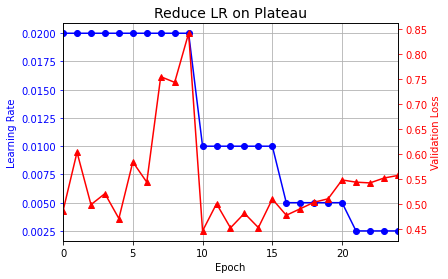

In [ ]:
plt.plot(history.epoch, history.history['lr'], 'bo-')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate', color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history['val_loss'], 'r^-')
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title('Reduce LR on Plateau', fontsize=14)
plt.show()

###tf.keras 스케줄러

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

s = 20 * len(X_train) // 32

learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs=25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4894 - accuracy: 0.8273 - val_loss: 0.4096 - val_accuracy: 0.8604
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3820 - accuracy: 0.8651 - val_loss: 0.3740 - val_accuracy: 0.8708
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3486 - accuracy: 0.8763 - val_loss: 0.3730 - val_accuracy: 0.8684
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3264 - accuracy: 0.8838 - val_loss: 0.3492 - val_accuracy: 0.8802
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.8896 - val_loss: 0.3428 - val_accuracy: 0.8794
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.8952 - val_loss: 0.3410 - val_accuracy: 0.8822
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2853 - accuracy: 0.8988 - val_loss: 0.3352 - val_accuracy:

In [ ]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001]
)

###1사이클 스케줄링

In [ ]:
k = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.rates = []
    self.losses = []

  def on_batch_end(self, batch, logs):
    self.rates.append(K.get_value(self.model.optimizer.lr))
    self.losses.append(logs['loss'])
    K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel('Learning rate')
    plt.ylabel('Loss')

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

430/430 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.3855


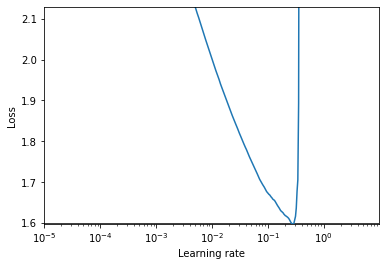

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
  def __init__(self, iterations, max_rate, start_rate=None,
               last_iterations=None, last_rate=None):
    self.iterations = iterations
    self.max_rate = max_rate
    self.start_rate = start_rate or max_rate / 10
    self.last_iterations = last_iterations or iterations // 10 + 1
    self.half_iteration = (iterations - self.last_iterations) // 2
    self.last_rate = last_rate or self.start_rate / 1000
    self.iteration = 0

  def _interpolate(self, iter1, iter2, rate1, rate2):
    return ((rate2 - rate1) * (self.iteration - iter1) / (iter2 - iter1) + rate1)
  
  def on_batch_begin(self, batch, logs):
    if self.iteration < self.half_iteration:
      rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
    
    elif self.iteration < 2 * self.half_iteration:
      rate = self._interpolate(self.half_iteration, 2 * self.half_iteration, self.max_rate, self.start_rate)

    else:
      rate = self._interpolate(2 * self.half_iteration, self.iterations, self.start_rate, self.last_rate)
    
    self.iteration += 1
    K.set_value(self.model.optimizer.lr, rate)

In [ ]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 3s 8ms/step - loss: 0.6572 - accuracy: 0.7739 - val_loss: 0.4872 - val_accuracy: 0.8336
Epoch 2/25
430/430 [==============================] - 3s 7ms/step - loss: 0.4581 - accuracy: 0.8396 - val_loss: 0.4275 - val_accuracy: 0.8522
Epoch 3/25
430/430 [==============================] - 3s 7ms/step - loss: 0.4122 - accuracy: 0.8547 - val_loss: 0.4114 - val_accuracy: 0.8584
Epoch 4/25
430/430 [==============================] - 3s 7ms/step - loss: 0.3837 - accuracy: 0.8643 - val_loss: 0.3870 - val_accuracy: 0.8684
Epoch 5/25
430/430 [==============================] - 3s 6ms/step - loss: 0.3640 - accuracy: 0.8718 - val_loss: 0.3765 - val_accuracy: 0.8684
Epoch 6/25
430/430 [==============================] - 3s 6ms/step - loss: 0.3457 - accuracy: 0.8775 - val_loss: 0.3746 - val_accuracy: 0.8710
Epoch 7/25
430/430 [==============================] - 3s 7ms/step - loss: 0.3330 - accuracy: 0.8812 - val_loss: 0.3636 - val_accuracy: 0.8716
Epoch 

##규제를 사용해 과대적합 피하기

###$\ell_1$과 $\ell_2$ 규제


In [ ]:
layer = keras.layers.Dense(100, activation='elu',
                           kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='elu',
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation='elu',
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation='softmax',
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 8ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation='elu',
                           kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 8ms/step - loss: 1.6630 - accuracy: 0.8122 - val_loss: 0.7201 - val_accuracy: 0.8308
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7188 - accuracy: 0.8266 - val_loss: 0.6806 - val_accuracy: 0.8402


###드롭아웃

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5669 - accuracy: 0.8050 - val_loss: 0.3605 - val_accuracy: 0.8646
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4206 - accuracy: 0.8457 - val_loss: 0.3448 - val_accuracy: 0.8692


###알파 드롭아웃

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs=20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6658 - accuracy: 0.7564 - val_loss: 0.5682 - val_accuracy: 0.8442
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5547 - accuracy: 0.7948 - val_loss: 0.5563 - val_accuracy: 0.8474
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5218 - accuracy: 0.8055 - val_loss: 0.4996 - val_accuracy: 0.8574
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5067 - accuracy: 0.8139 - val_loss: 0.4785 - val_accuracy: 0.8572
Epoch 5/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4925 - accuracy: 0.8165 - val_loss: 0.4434 - val_accuracy: 0.8634
Epoch 6/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4844 - accuracy: 0.8206 - val_loss: 0.4518 - val_accuracy: 0.8680
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4734 - accuracy: 0.8239 - val_loss: 0.4769 - val_accuracy:

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4603 - accuracy: 0.8644


[0.4603305160999298, 0.8644000291824341]

In [ ]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 3s 2ms/step - loss: 0.3419 - accuracy: 0.8848


[0.341852068901062, 0.8847636580467224]

In [ ]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 7s 4ms/step - loss: 0.4180 - accuracy: 0.8454


###MC 드롭아웃

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
y_probas = np.stack([model(X_test_scaled, training=True)
                      for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [ ]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.41, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.18, 0.  , 0.79]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.06, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.1 , 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.55, 0.  , 0.4 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.19, 0.  , 0.55]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.12, 0.  , 0.83]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.17, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.16, 0.  , 0

In [ ]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.14, 0.  , 0.74]],
      dtype=float32)

In [ ]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.01, 0.21, 0.02, 0.29]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=1)

In [ ]:
accuracy = np.sum(y_pred==y_test) / len(y_test)
accuracy

0.8692

In [ ]:
class MCDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if in
])